# Task 1: Data Exploration


**Task 1a**


In [619]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [620]:
live_df = pd.read_csv('live1.csv')

live_df.head()



,Area,Item,Element,Year,Unit,Value
0,Afghanistan,Asses,Stocks,1961,Head,1300000.0
1,Afghanistan,Asses,Stocks,1962,Head,851850.0
2,Afghanistan,Asses,Stocks,1963,Head,1001112.0
3,Afghanistan,Asses,Stocks,1964,Head,1150000.0
4,Afghanistan,Asses,Stocks,1965,Head,1300000.0


In [621]:
live_df.describe()

,Year,Value
count,122458.000000,1.201940e+05
mean,1991.376439,1.035597e+07
std,17.260431,5.869386e+07
min,1961.000000,0.000000e+00
25%,1976.000000,5.300000e+03
50%,1992.000000,1.021735e+05
75%,2006.000000,1.561571e+06
max,2020.000000,1.525939e+09


In [622]:
live_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122458 entries, 0 to 122457
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     122458 non-null  object 
 1   Item     122458 non-null  object 
 2   Element  122458 non-null  object 
 3   Year     122458 non-null  int64  
 4   Unit     122458 non-null  object 
 5   Value    120194 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [623]:
live_df.nunique()

Area         243
Item          14
Element        1
Year          60
Unit           3
Value      61412
dtype: int64

**Task 1b**


# Task 2: Data Cleaning

Since we have few null-values and a lot of data, we remove all null-values.


In [624]:
live_df = live_df.dropna()


In [625]:
live_df.isnull().sum()

Area       0
Item       0
Element    0
Year       0
Unit       0
Value      0
dtype: int64

In [626]:

live_df = live_df.drop_duplicates(subset = None, keep = 'first')



In [627]:
print(type(live_df))

<class 'pandas.core.frame.DataFrame'>


In [628]:
value_df = live_df['Value']

display(value_df)

0           1300000.0
1            851850.0
2           1001112.0
3           1150000.0
4           1300000.0
             ...     
122453    364166482.0
122454    371357850.0
122455    377303293.0
122456    397970957.0
122457    406555086.0
Name: Value, Length: 120194, dtype: float64

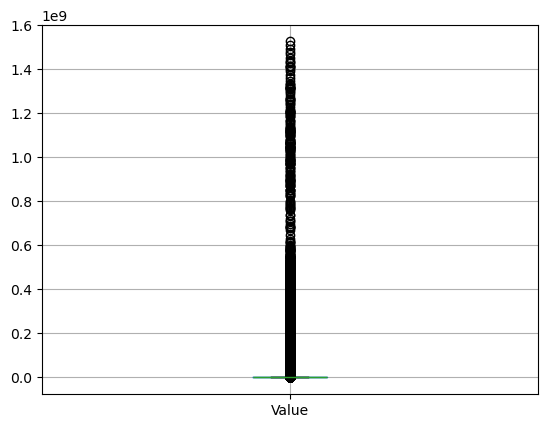

In [629]:
value_df = value_df.to_frame()
value_boxplot = value_df.boxplot()
plt.show()



In [630]:
# checking if there is any rows that is not "stocks", it is not, therefore we delete
stocks_df = live_df[live_df['Element'] != 'Stocks']
stocks_df.head()

,Area,Item,Element,Year,Unit,Value


In [631]:
distinct_country_count = live_df['Area'].nunique()
print(f'Distinct countries: {distinct_country_count}')

Distinct countries: 243


In [632]:
finland_df = live_df[live_df['Area'] == 'Finland']
finland_df.head()

,Area,Item,Element,Year,Unit,Value
31607,Finland,Beehives,Stocks,1961,No,20000.0
31608,Finland,Beehives,Stocks,1962,No,20000.0
31609,Finland,Beehives,Stocks,1963,No,19000.0
31610,Finland,Beehives,Stocks,1964,No,19000.0
31611,Finland,Beehives,Stocks,1965,No,20000.0


In [633]:
mask = finland_df['Unit'] == '1000 Head'  
finland_df.loc[mask, 'Value'] = finland_df.loc[mask, 'Value'] * 1000  
finland_df.loc[mask, 'Unit'] = 'Head' 

#display(norway_df[norway_df['Unit'] == '1000 Head'])


In [634]:
finland_df = finland_df[finland_df['Item'] != 'Chickens']

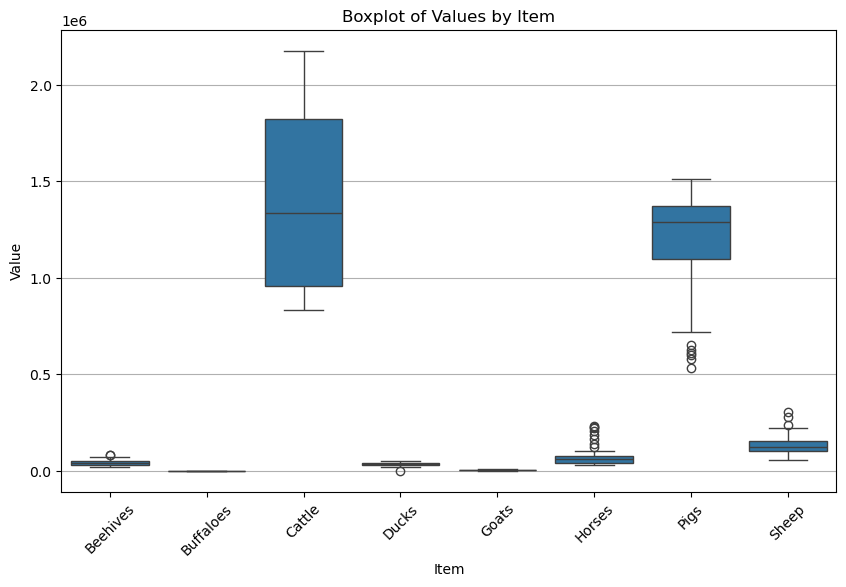

In [635]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=finland_df)

# Customize the plot
plt.title('Boxplot of Values by Item')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

In [636]:
finland_df = finland_df[finland_df['Year'] >= 1970]

display(finland_df)

,Area,Item,Element,Year,Unit,Value
31616,Finland,Beehives,Stocks,1970,No,22000.0
31617,Finland,Beehives,Stocks,1971,No,22000.0
31618,Finland,Beehives,Stocks,1972,No,30000.0
31619,Finland,Beehives,Stocks,1973,No,30000.0
31620,Finland,Beehives,Stocks,1974,No,30000.0
...,...,...,...,...,...,...
32075,Finland,Sheep,Stocks,2016,Head,156496.0
32076,Finland,Sheep,Stocks,2017,Head,155926.0
32077,Finland,Sheep,Stocks,2018,Head,154999.0
32078,Finland,Sheep,Stocks,2019,Head,144880.0


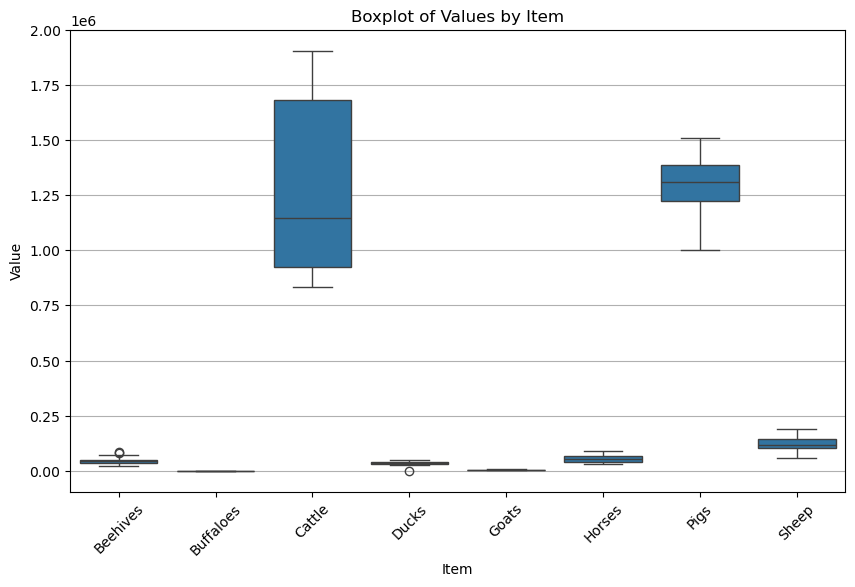

In [637]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item', y='Value', data=finland_df)

# Customize the plot
plt.title('Boxplot of Values by Item')
plt.xlabel('Item')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()